# Geeta Upadhyay

 # <font color='brown'>DATA SCIENCE AND BUSINESS ANALYTICS INTERN (Grip July 2021)</font>

# @ The Sparks Foundation

# <font color= 'Green'> Task-1 : Prediction Using Supervised ML </font>
## Problem: To predict the percentage of the student based on their studying hours 
## Data available at - http://bit.ly/w-data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("http://bit.ly/w-data")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
print(data.shape)
print('-----------------------------------------------')
print("\n")
print(data.info())
print('-----------------------------------------------')
print("\n")
print(data.isnull().sum())

(25, 2)
-----------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None
-----------------------------------------------


Hours     0
Scores    0
dtype: int64


In [4]:
data.describe() #statistical description

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# <font color='green'>1. Analysing the dataset</font>

Text(0.5, 1.0, 'Frequency Vs Scores\n')

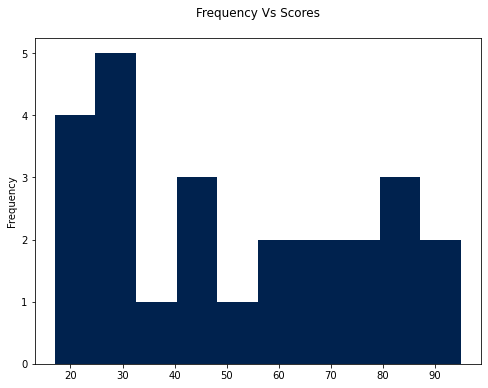

In [5]:

data["Scores"].plot.hist(colormap="cividis", figsize=(8,6))
plt.title("Frequency Vs Scores\n")

#### ----> The above plot reflects the information that there are less number of people who scored between 60-90 if compared to the number of students who scored between 20-30.

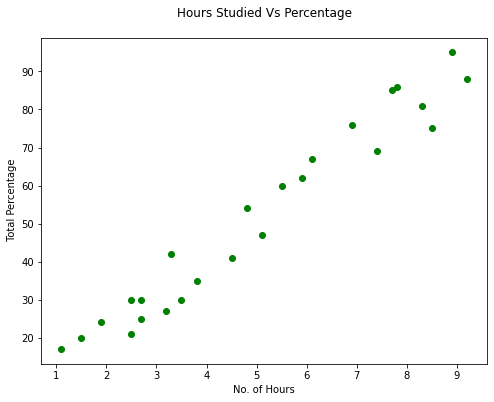

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(data['Hours'], data["Scores"], c="green", marker="o")
plt.title("Hours Studied Vs Percentage\n")
plt.xlabel("No. of Hours")
plt.ylabel(" Total Percentage")
plt.show()

#### --->The above scatter plot shows a correlation between the number of hours a student studies for and their obtained percentage. It can be said ( on the basis of this plot) that a student who studies for longer hours obtains a much higher percentage as compared to a student that studies for less than 4 hours. 

In [7]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### ----> This matrix tells  us that they are strongly related.

# <font color='green'> 2. Model training and testing </font>

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [9]:
Hours=data.iloc[:, :-1].values
Score=data.iloc[:,1].values

In [10]:
print(Hours.shape, Score.shape)

(25, 1) (25,)


In [13]:
x_train, x_test, y_train, y_test =train_test_split(Hours,Score, test_size=0.3, random_state=0)

In [14]:
LR=LinearRegression()
LR.fit(x_train, y_train)
print("MODEL TRAINED!!")

MODEL TRAINED!!


In [16]:
Predicted_test=LR.predict(x_test)
print("VALUES PREDICTED!!")

VALUES PREDICTED!!


In [17]:
predicted_data=pd.DataFrame({"hours":[k for k in x_test], 'actual_score':[i for i in y_test], 'Predicted_score':[j for j in Predicted_test]})

In [18]:
predicted_data.iloc[1:3,:]

,hours,actual_score,Predicted_score
1,[3.2],27,33.694229
2,[7.4],69,74.806209


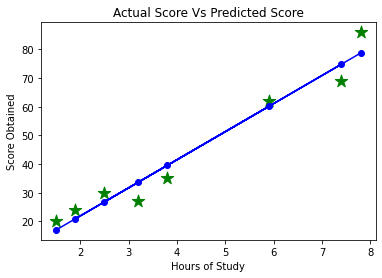

In [19]:
plt.scatter(x_test, y_test, color="green", marker="*", s=170)
plt.plot(x_test, Predicted_test, color="blue", marker="o")
plt.title("Actual Score Vs Predicted Score")
plt.xlabel("Hours of Study")
plt.ylabel("Score Obtained")
plt.show()

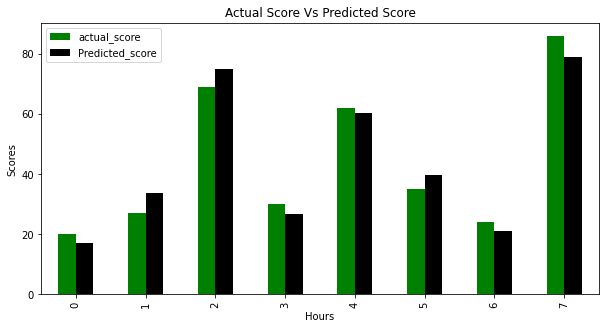

In [20]:
predicted_data.iloc[:,1:3].plot(kind="bar", color= 'gk', figsize=(10,5))
plt.title("Actual Score Vs Predicted Score")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [21]:
hour=9.3
score_pred=LR.predict(np.array(hour).reshape(1,-1))
print("the predicted score for a student who studies for 10 hours is :", score_pred)

the predicted score for a student who studies for 10 hours is : [93.40448557]


In [22]:
print("The mean absolute error is :", mean_absolute_error(y_test, Predicted_test))
print("The mean squared error is : ", mean_squared_error(y_test, Predicted_test))
print("the root mean squared error (RMS) is:", np.sqrt(mean_squared_error(y_test, Predicted_test)))
print("the R-2 score i.e. coefficient of determination is :" , r2_score(y_test, Predicted_test))

The mean absolute error is : 4.419727808027652
The mean squared error is :  22.96509721270043
the root mean squared error (RMS) is: 4.792191274636315
the R-2 score i.e. coefficient of determination is : 0.9568211104435257


#### less  MAE value means that chances of predicting wrong score are low.
#### the R-2 score i.e. coefficient of determination must be closer to 1 and tells how better a model predicts.

# <font color="green">3. Conclusion </font>


#### Since the model predicted results closer and similar to the actual ones like hypothetically for a student studying for 9.5 hours their predicted score is 93.4% which can be considered closer to what the actual would have been, hence we conclude that our model is effectively good and precise.
